[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


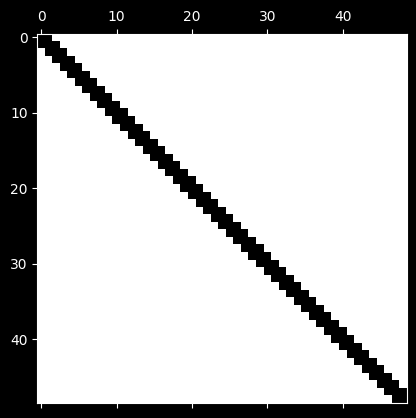

In [8]:
#8.1.2
import matplotlib.pyplot as plt
from scipy import sparse
from numpy import ones
from sympy.physics.quantum.matrixutils import sparse
from sympy.plotting.series import flat

n = 50
data = [ones(n - 2), -2 * ones(n), ones(n - 2), ones(1), ones(1)]
offset = [-1, 0, 1, n - 1, 1 - n]
A = sparse.diags(data, offset, format="lil")
plt.spy(A[:50, :50].todense())
print(A[:50, :50].todense())





In [28]:
#8.2.2
import scipy.io as spio
import matplotlib.pyplot as plt
from scipy import sparse
from numpy import ones, array
import numpy as np

def lufact(A):

    n = A.shape[0]     # detect the dimensions from the input
    L = np.eye(n)      # ones on main diagonal, zeros elsewhere
    U = np.zeros((n, n))
    A_k = A.toarray().astype(float)   # make a working copy

    # Reduction by np.outer products
    for k in range(n-1):
        U[k, :] = A_k[k, :]
        L[:, k] = A_k[:, k] / U[k,k]
        A_k -= np.outer(L[:,k], U[k,:])
    U[n-1, n-1] = A_k[n-1, n-1]
    return L, U

def qrfact(A):
    m, n = A.shape
    Qt = np.eye(m)
    R = A.toarray().astype(float)
    for k in range(n):
        z = R[k:, k]
        w = np.hstack((-np.sign(z[0]) * np.linalg.norm(z) - z[0], -z[1:]))
        nrmw = np.linalg.norm(w)
        if nrmw < np.finfo(float).eps: continue    # skip this iteration
        v = w / nrmw
        # Apply the reflection to each relevant column of R and Q
        for j in range(k, n):
            R[k:, j] -= 2 * np.dot(v, R[k:, j]) * v
        for j in range(m):
            Qt[k:, j] -= 2 * np.dot(v, Qt[k:, j]) * v
    return Qt.T, np.triu(R)

A = spio.mmread("smallworld.mtx")
m, n = A.shape
density = []
An = [sparse.linalg.matrix_power(A, 2 ** j) for j in range(0, 4)]
for i in range(0, 4):
    density.append(An[i].nnz / (m * n))

densityL = 0
densityU = 0
L, U = lufact(A)
L_s = sparse.csr_matrix(L)
U_s = sparse.csr_matrix(U)
densityL = L_s.nnz / (m * n)
densityU = U_s.nnz / (m * n)
print(densityL, densityU)

densityQ = 0
densityR = 0
Q, R = qrfact(A)
Q_s = sparse.csr_matrix(Q)
R_s = sparse.csr_matrix(R)
densityQ = Q_s.nnz / (m * n)
densityR = R_s.nnz / (m * n)
print(densityQ, densityR)


0.9901 0.981
0.6228 0.3722


C:\Users\entropy\AppData\Local\Temp\ipykernel_17956\3519115097.py:18: RuntimeWarning: divide by zero encountered in divide
  L[:, k] = A_k[:, k] / U[k,k]
C:\Users\entropy\AppData\Local\Temp\ipykernel_17956\3519115097.py:18: RuntimeWarning: invalid value encountered in divide
  L[:, k] = A_k[:, k] / U[k,k]


In [20]:
#8.2.3
import scipy.io as spio
import numpy as np
from scipy import sparse

A = spio.mmread("roswell.mtx")
m, n = A.shape
diag_element = A.diagonal()
#print(diag_element)

'''笨方法
difference = []

A_coo = A.tocoo()
k = A_coo.shape[1]
rows = A_coo.row
cols = A_coo.col
values = A_coo.data

difference = []

A_csr = A.tocsr()
for i in range(k):
    r = rows[i]
    c = cols[i]
    v = values[i]
    v_i = A_csr[c, r]
    difference.append(abs(v - v_i))

print(difference)
'''

#print(abs(A - A.T))

#print((m * n) - A.nnz)

#计算每一行的和（出度）
row_sums = A.sum(axis=1).A1
col_sums = A.sum(axis=0).A1
#获取最大值
max_val_r = row_sums.max()
max_val_c = col_sums.max()
#获取索引
max_idx_r = row_sums.argmax()
max_idx_c = col_sums.argmax()

print(max_idx_r, max_val_r)
print(max_idx_c, max_val_c)

A3 = sparse.linalg.matrix_power(A, 3)
print(A3.nnz / (m * n))






27 215.0
4 107.0
0.004944438021094282


In [22]:
#8.1.4
import scipy.io as spio
import numpy as np
from scipy import sparse

A = spio.mmread("roswell.mtx")

#构造D
col_sums = A.sum(axis=0).A1
D = np.diag(col_sums)
#初始化L
L = D - A

#主程序
ev, V = sparse.linalg.eigs(A, k=5, which="LM")
print(ev)



[-7.3733428 +0.j  7.3733428 +0.j -3.31662479+0.j  3.31662479+0.j
 -3.31662479+0.j]


In [27]:
#8.1.5
import scipy.io as spio
import numpy as np
from scipy import sparse

A = spio.mmread("actors.mtx")
m, n = A.shape
row_sums = A.sum(axis=1).A1
col_sums = A.sum(axis=0).A1
max = row_sums.max()
print(max)

sum = 0
for i in range(n):
    if col_sums[i] == 3:
        sum += 1;
print(sum)

C = A.T @ A
print(C.nnz)
#C_{ij}的含义即为有多少个演员同时参演了电影i和j

294.0
21528
30459806


In [3]:
#8.1.6
import numpy as np
import scipy.sparse as sp

def poisson(n):
    """
    构造二维 n*n 网格上的离散 Poisson 矩阵（五点算子）
    矩阵总大小为 (n^2) x (n^2)
    """
    # 1. 首先构造一维的二阶差分矩阵 T (三对角矩阵)
    # 主对角线为 2，左右对角线为 -1
    # 例如 n=3 时，T = [[2, -1, 0], [-1, 2, -1], [0, -1, 2]]
    data = [np.ones(n) * 2, np.ones(n-1) * -1, np.ones(n-1) * -1]
    offsets = [0, 1, -1]
    T = sp.diags(data, offsets, shape=(n, n), format='csr')

    # 2. 利用克罗内克和 (Kronecker Sum) 将一维算子扩展为二维
    # 公式逻辑: L_2d = (T ⊗ I) + (I ⊗ T)
    # 这会生成一个每行最多 5 个非零元素的 n^2 * n^2 稀疏矩阵
    # 主对角线变成 4 (即 2+2)，四个邻居权重为 -1
    L = sp.kronsum(T, T, format='csr')

    return L

n = 50
k1 = 1
N = n**2
I = sp.eye(N, format='csr')
A = poisson(n) - k1**2*I
m, n = A.shape
print(m * n, A.nnz / (m * n))

ev1, V1 = sp.linalg.eigs(A, k=4, which="LM")
ev2, V2 = sp.linalg.eigs(A, k=4, which="SM")
#print(ev1)
#print(ev2)


n = 50
k1 = 1
N = n**2
I = sp.eye(N, format='csr')
A = poisson(n) - k1**2*I

#利用特征值的平移性质
ev, V = sp.linalg.eigsh(A, k=5, which="SA")
vals = np.sort(ev)

lam3 = vals[2]
lam4 = vals[3]

k_square = (lam3 + lam4) / 2
k_value = np.sqrt(abs(k_square))

print(k_value)







6250000 0.001968
0.9876056185304177
